In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import os

In [3]:
raw_train=pd.read_csv(os.path.join('G:\M.tech\MechineLearning\Data','train.csv'),index_col='Id')
raw_test=pd.read_csv(os.path.join('G:\M.tech\MechineLearning\Data','test.csv'),index_col='Id')

In [4]:
raw_train['BusinessTravel'].value_counts()

Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64

In [5]:
train=raw_train.copy()
test=raw_test.copy()
train['BusinessTravel'][raw_train['BusinessTravel']=='Non-Travel']=0
train['BusinessTravel'][raw_train['BusinessTravel']=='Travel_Rarely']=1
train['BusinessTravel'][raw_train['BusinessTravel']=='Travel_Frequently']=2
test['BusinessTravel'][raw_test['BusinessTravel']=='Non-Travel']=0
test['BusinessTravel'][raw_test['BusinessTravel']=='Travel_Rarely']=1
test['BusinessTravel'][raw_test['BusinessTravel']=='Travel_Frequently']=2

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
G:\Anaconda\li

In [6]:
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,0,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,1,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,1,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,1,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,1,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [7]:
train_dummy=pd.concat([train.Department,train.EducationField,train.Gender,train.JobRole,train.MaritalStatus],axis=1)
test_dummy=pd.concat([test.Department,test.EducationField,test.Gender,test.JobRole,test.MaritalStatus],axis=1)
train_en=pd.get_dummies(train_dummy)
test_en=pd.get_dummies(test_dummy)
train.OverTime[train.OverTime=='Yes']=1
train.OverTime[train.OverTime=='No']=0
test.OverTime[test.OverTime=='Yes']=1
test.OverTime[test.OverTime=='No']=0

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [8]:
ytrain=train.Attrition
train=train.drop(columns=['Department','EducationField','Gender','JobRole','MaritalStatus','Attrition','EmployeeNumber','Behaviour'])
train=pd.concat([train,train_en],axis=1)
test=test.drop(columns=['Department','EducationField','Gender','JobRole','MaritalStatus','EmployeeNumber','Behaviour'])
test=pd.concat([test,test_en],axis=1)

In [9]:
 X_train, X_test, y_train, y_test=tts(train,ytrain)

In [10]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import DecisionTreeRegressor as dr
from sklearn.ensemble import RandomForestClassifier as rf
model1 = SVC(C=100,kernel='rbf',probability=True)
model2=dt()
model3=dr()
model4=rf()

In [11]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
y_=model1.predict_proba(X_test)

In [13]:
y_p=y_[:,1]
y_p1=model3.predict(X_test)
y_p2=model4.predict_proba(X_test)[:,1]
yout3=model4.predict(X_test)

In [14]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_p)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_p1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_p2)

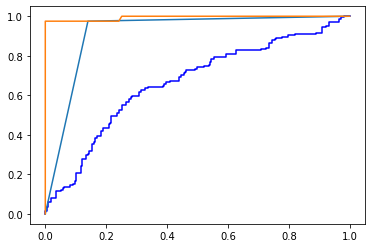

In [15]:

plt.plot(fpr, tpr, 'b')
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.show()

In [16]:
yout=model1.predict(X_test)
metrics.accuracy_score(y_test, yout)

0.6560196560196561

In [17]:
yout1=model2.predict(X_test)
metrics.accuracy_score(y_test, yout1)

0.914004914004914

In [18]:
metrics.accuracy_score(y_test, yout3)

0.9582309582309583

In [31]:
model5=rf(n_estimators=200,criterion='entropy')
model5.fit(train,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred=model5.predict_proba(test)[:,1]


In [33]:
sub=pd.DataFrame(y_pred,columns=['Attrition'],index=raw_test.index)
sub.head()

,Attrition
Id,
1,0.055
2,0.080
3,0.140
4,0.120
5,0.060


In [34]:
sub.to_csv('G:\M.tech\MechineLearning\Data\sub3.csv')